In [0]:
import numpy as np
import matplotlib.pyplot as plt

1.  產生二維陣列
2.  產生隨機二維陣列   及標籤
3.  整理為數據集

In [0]:
array_1 = np.array([3,3])
array_2 = np.array([1,4])
sig = 0.4
sigma_1 = np.array([[sig**2 ,0],[0, sig**2]])

In [0]:
array_1

array([3, 3])

In [0]:
array_2

array([1, 4])

In [0]:
data_1 = np.random.multivariate_normal(array_1 , sigma_1 , 90 )
data_2 = np.random.multivariate_normal(array_2 , sigma_1 , 90 )

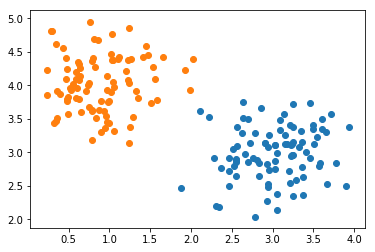

In [0]:
plt.scatter(data_1[:,0] , data_1[:,1])
plt.scatter(data_2[:,0] , data_2[:,1])
plt.show()

In [0]:
data_set = np.vstack([data_1, data_2])
label = np.hstack([np.zeros(90), np.ones(90)])

In [0]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Dense(input_dim = 2 , units = 1 ,activation= 'sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])

In [0]:
model.fit( data_set , label , batch_size =20 , epochs = 100 )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
180/180 [==============================] - 1s 3ms/step - loss: 0.4697 - acc: 0.5000
Epoch 2/100
180/180 [==============================] - 0s 70us/step - loss: 0.4685 - acc: 0.5000
Epoch 3/100
180/180 [==============================] - 0s 65us/step - loss: 0.4673 - acc: 0.5000
Epoch 4/100
180/180 [==============================] - 0s 59us/step - loss: 0.4659 - acc: 0.5000
Epoch 5/100
180/180 [==============================] - 0s 62us/step - loss: 0.4644 - acc: 0.5000
Epoch 6/100
180/180 [==============================] - 0s 72us/step - loss: 0.4628 - acc: 0.5000
Epoch 7/100
180/180 [==============================] - 0s 58us/step - loss: 0.4611 - acc: 0.5000
Epoch 8/100
180/180 [==============================] - 0s 55us/step - loss: 0.4592 - acc: 0.5000
Epoch 9/100
180/180 [==============================] - 0s 58us/step - loss: 0.4572 - acc: 0.5000
Epoch 10/100
180/180 [==============================] - 0s 69us/step - loss: 0.4

In [0]:
model.predict_classes(np.array([[3.5,3.5]]))

array([[0]], dtype=int32)

In [0]:
model.predict_classes(np.array([[1 , 5]]))

array([[1]], dtype=int32)

In [0]:
x = np.linspace(0,5,100)
y = np.linspace(0,5,100)
xx , yy = np.meshgrid(x , y)
zz = model.predict_classes(np.vstack([xx.ravel() , yy.ravel()]).T)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

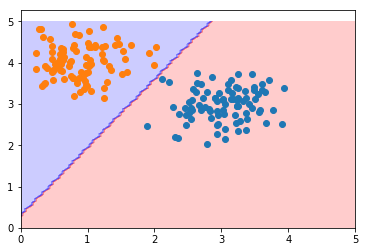

In [0]:
plt.contourf(xx , yy, zz.reshape(xx.shape) , cmap = cmap , alpha=0.2)
plt.scatter(data_1[:,0] , data_1[:,1])
plt.scatter(data_2[:,0] , data_2[:,1])
plt.show()

In [0]:
from keras.models import Model, Input
from keras.layers import Dense

In [0]:
inp = Input(shape=(2,))
midle = Dense(units = 20, activation ='tanh')(inp)
out = Dense(units = 1 , activation ='sigmoid')(midle)

model = Model(inputs = [inp], outputs = [out] )

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse' , optimizer='sgd' , metrics =['accuracy'])
model.fit(data_set, label , batch_size = 10 , epochs = 100)

Epoch 1/100
180/180 [==============================] - 0s 734us/step - loss: 0.3179 - acc: 0.5000
Epoch 2/100
180/180 [==============================] - 0s 103us/step - loss: 0.2498 - acc: 0.5000
Epoch 3/100
180/180 [==============================] - 0s 130us/step - loss: 0.1900 - acc: 0.5611
Epoch 4/100
180/180 [==============================] - 0s 115us/step - loss: 0.1535 - acc: 0.9333
Epoch 5/100
180/180 [==============================] - 0s 104us/step - loss: 0.1319 - acc: 0.9889
Epoch 6/100
180/180 [==============================] - 0s 100us/step - loss: 0.1167 - acc: 0.9944
Epoch 7/100
180/180 [==============================] - 0s 109us/step - loss: 0.1046 - acc: 1.0000
Epoch 8/100
180/180 [==============================] - 0s 121us/step - loss: 0.0944 - acc: 1.0000
Epoch 9/100
180/180 [==============================] - 0s 121us/step - loss: 0.0859 - acc: 1.0000
Epoch 10/100
180/180 [==============================] - 0s 116us/step - loss: 0.0783 - acc: 1.0000
Epoch 11/100
180/18

In [0]:
model_2 = Sequential()

model_2.add(Dense(input_dim = 2 , units = 1000 ,activation= 'tanh'))
model_2.add(Dense( units = 1000 ,activation= 'tanh'))
model_2.add(Dense( units = 1 ,activation= 'tanh'))

model_2.summary()
model_2.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])
model_2.fit( data_set_2 , label , batch_size =20 , epochs = 500 )

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1000)              3000      
_________________________________________________________________
dense_24 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 1001      
Total params: 1,005,001
Trainable params: 1,005,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
180/180 [==============================] - 0s 2ms/step - loss: 0.2752 - acc: 0.6222
Epoch 2/500
180/180 [==============================] - 0s 505us/step - loss: 0.1435 - acc: 0.8000
Epoch 3/500
180/180 [==============================] - 0s 478us/step - loss: 0.1434 - acc: 0.8056
Epoch 4/500
180/180 [==============================] - 0s 516us/step - loss: 0.1198 - acc: 0.8611
Epoch 

In [0]:
model_2.fit( data_set_2 , label , batch_size =20 , epochs = 500 )


Epoch 1/500
180/180 [==============================] - 0s 105us/step - loss: 0.0120 - acc: 0.9889
Epoch 2/500
180/180 [==============================] - 0s 79us/step - loss: 0.0120 - acc: 0.9889
Epoch 3/500
180/180 [==============================] - 0s 75us/step - loss: 0.0120 - acc: 0.9889
Epoch 4/500
180/180 [==============================] - 0s 79us/step - loss: 0.0120 - acc: 0.9889
Epoch 5/500
180/180 [==============================] - 0s 80us/step - loss: 0.0120 - acc: 0.9889
Epoch 6/500
180/180 [==============================] - 0s 76us/step - loss: 0.0120 - acc: 0.9889
Epoch 7/500
180/180 [==============================] - 0s 75us/step - loss: 0.0120 - acc: 0.9889
Epoch 8/500
180/180 [==============================] - 0s 74us/step - loss: 0.0120 - acc: 0.9889
Epoch 9/500
180/180 [==============================] - 0s 74us/step - loss: 0.0120 - acc: 0.9889
Epoch 10/500
180/180 [==============================] - 0s 75us/step - loss: 0.0120 - acc: 0.9889
Epoch 11/500
180/180 [======

In [0]:
x = np.linspace(-2,6,100)
y = np.linspace(0,7,100)
xx , yy = np.meshgrid(x , y)
pred = model.predict(np.vstack([xx.ravel() , yy.ravel()]).T)
zz = np.where(pred >= 0.5 , 1 , 0)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

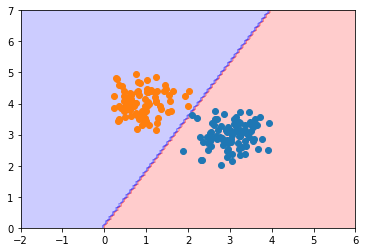

In [0]:
plt.contourf(xx , yy, zz.reshape(xx.shape) , cmap = cmap , alpha=0.2)
plt.scatter(data_1[:,0] , data_1[:,1])
plt.scatter(data_2[:,0] , data_2[:,1])
plt.show()

In [0]:
model.predict(np.vstack([xx.ravel() , yy.ravel()]).T)

array([[0.9665822 ],
       [0.9641186 ],
       [0.96129656],
       ...,
       [0.03630528],
       [0.03390431],
       [0.03179079]], dtype=float32)

In [0]:
model.predict(np.array([[2,4]]))

array([[0.6400683]], dtype=float32)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
m_1 = np.array([3,3])
m_2 = np.array([-3,-3])
m_3 = np.array([-3,3])
m_4 = np.array([3,-3])

sigma = np.array([ [0.6**2 , 0 ],[0, 0.6**2]])

data_1 = np.random.multivariate_normal( m_1, sigma , 90)
data_2 = np.random.multivariate_normal( m_2, sigma , 90)
data_3 = np.random.multivariate_normal( m_3, sigma , 90)
data_4 = np.random.multivariate_normal( m_4, sigma , 90)

label = np.hstack([np.zeros(90*2), np.ones(90*2)])
data = np.vstack([data_1, data_2 , data_3, data_4])

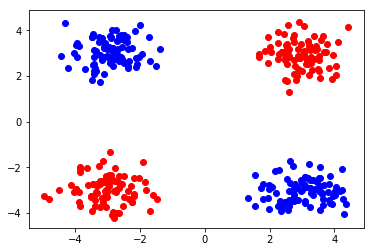

In [0]:
plt.scatter( data[label==0 , 0] ,data[label==0 , 1] , color='red' )
plt.scatter( data[label==1 , 0] ,data[label==1 , 1] , color='blue' )
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add( Dense( input_dim = 2 , units = 10 , activation = 'relu'))
#model.add( Dense( units = 10 , activation ='relu'))
model.add( Dense( units = 1 , activation ='tanh'))
model.compile( loss='mse' , optimizer ='sgd' , metrics=['accuracy'])

In [0]:
model.fit(data, label , batch_size = 10 , epochs = 20)

Epoch 1/20
360/360 [==============================] - 0s 577us/step - loss: 0.5116 - acc: 0.4667
Epoch 2/20
360/360 [==============================] - 0s 88us/step - loss: 0.1585 - acc: 0.7500
Epoch 3/20
360/360 [==============================] - 0s 90us/step - loss: 0.1269 - acc: 0.7500
Epoch 4/20
360/360 [==============================] - 0s 83us/step - loss: 0.1051 - acc: 0.7500
Epoch 5/20
360/360 [==============================] - 0s 85us/step - loss: 0.0888 - acc: 0.7500
Epoch 6/20
360/360 [==============================] - 0s 83us/step - loss: 0.0757 - acc: 0.8306
Epoch 7/20
360/360 [==============================] - 0s 87us/step - loss: 0.0661 - acc: 1.0000
Epoch 8/20
360/360 [==============================] - 0s 85us/step - loss: 0.0583 - acc: 1.0000
Epoch 9/20
360/360 [==============================] - 0s 88us/step - loss: 0.0523 - acc: 1.0000
Epoch 10/20
360/360 [==============================] - 0s 87us/step - loss: 0.0474 - acc: 1.0000
Epoch 11/20
360/360 [=================

In [0]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
xx , yy = np.meshgrid(x , y)
pred = model.predict(np.vstack([xx.ravel() , yy.ravel()]).T)
zz = np.where(pred >= 0.5 , 1 , 0)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'blue'])

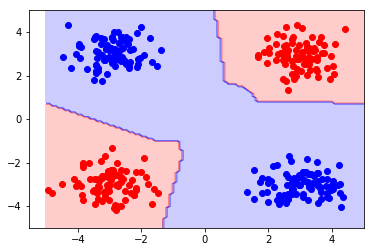

In [0]:
plt.contourf(xx , yy, zz.reshape(xx.shape) , cmap = cmap , alpha=0.2)
plt.scatter( data[label==0 , 0] ,data[label==0 , 1] , color='red' )
plt.scatter( data[label==1 , 0] ,data[label==1 , 1] , color='blue' )
plt.show()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" , header = None)
data_set = data.iloc[:,[0,2]].values

In [0]:
label = data.iloc[:,4].values
label = np.where(label == 'Iris-setosa' , 0 , label )
label = np.where(label == 'Iris-versicolor' , 1 , label )
label = np.where(label == 'Iris-virginica' , 2 , label )
label = label.astype("float32")

In [0]:
from keras.utils import to_categorical
label_one_hot = to_categorical(label)

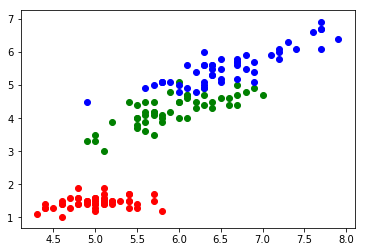

In [0]:
plt.scatter( data_set[:50,0] , data_set[:50,1] , color = 'red')
plt.scatter( data_set[50:100,0] , data_set[50:100,1] , color = 'green')
plt.scatter( data_set[100:150,0] , data_set[100:150,1] , color = 'blue')
plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()
model.add( Dense(input_dim = 2 , units = 15 , activation = 'tanh'))
model.add( Dense(units = 3 , activation = 'softmax'))
model.compile( loss='mse' , optimizer = 'sgd' , metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 15)                45        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 48        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(data_set , label_one_hot , batch_size = 10 , epochs = 500)

Epoch 1/500
150/150 [==============================] - 0s 157us/step - loss: 0.1133 - acc: 0.7733
Epoch 2/500
150/150 [==============================] - 0s 122us/step - loss: 0.1128 - acc: 0.7867
Epoch 3/500
150/150 [==============================] - 0s 123us/step - loss: 0.1122 - acc: 0.7867
Epoch 4/500
150/150 [==============================] - 0s 123us/step - loss: 0.1120 - acc: 0.8267
Epoch 5/500
150/150 [==============================] - 0s 135us/step - loss: 0.1114 - acc: 0.8133
Epoch 6/500
150/150 [==============================] - 0s 134us/step - loss: 0.1110 - acc: 0.8533
Epoch 7/500
150/150 [==============================] - 0s 129us/step - loss: 0.1107 - acc: 0.7933
Epoch 8/500
150/150 [==============================] - 0s 125us/step - loss: 0.1103 - acc: 0.8467
Epoch 9/500
150/150 [==============================] - 0s 137us/step - loss: 0.1098 - acc: 0.8333
Epoch 10/500
150/150 [==============================] - 0s 124us/step - loss: 0.1094 - acc: 0.8333
Epoch 11/500
150/15

In [0]:
x = np.linspace(0,9,100)
y = np.linspace(0,9,100)
xx , yy = np.meshgrid(x , y)
zz = model.predict_classes(np.vstack([xx.ravel() , yy.ravel()]).T)
#zz = np.where(pred >= 0.5 , 1 , 0)
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['red', 'green','blue'])

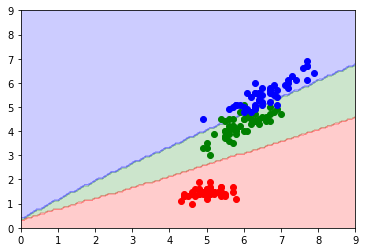

In [0]:
plt.contourf(xx , yy, zz.reshape(xx.shape) , cmap = cmap , alpha=0.2)
plt.scatter( data_set[:50,0] , data_set[:50,1] , color = 'red')
plt.scatter( data_set[50:100,0] , data_set[50:100,1] , color = 'green')
plt.scatter( data_set[100:150,0] , data_set[100:150,1] , color = 'blue')
plt.show()


In [0]:
from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
(data_train , label_train) ,(data_test , label_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
data_train.shape

(60000, 28, 28)

In [0]:
import matplotlib.pyplot as plt

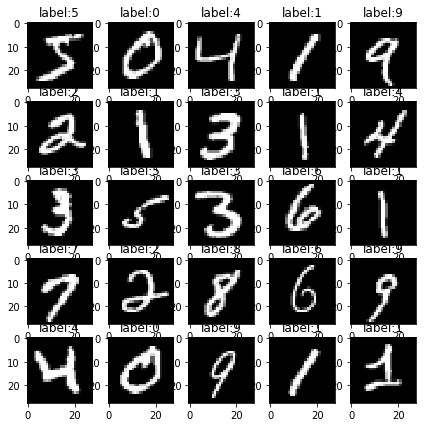

In [0]:
plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(data_train[i,:,:], cmap='gray')
    plt.title("label:{}".format(label_train[i]))
plt.show()

In [0]:
data_train_normal = data_train.reshape(60000, 28*28)/255

In [0]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout

label_train_one_hot = to_categorical(label_train)

In [0]:
model = Sequential()
model.add(Dense( input_dim = 28*28 , units = 200 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(  units = 200 , activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(  units = 10 , activation = "softmax"))
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               157000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(data_train_normal , label_train_one_hot , batch_size = 500 ,epochs =50 )

Epoch 1/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0772 - acc: 0.9758
Epoch 2/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0768 - acc: 0.9760
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0750 - acc: 0.9766
Epoch 4/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0734 - acc: 0.9773
Epoch 5/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.0697 - acc: 0.9776
Epoch 6/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0680 - acc: 0.9783
Epoch 7/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0673 - acc: 0.9786
Epoch 8/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0683 - acc: 0.9783
Epoch 9/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0647 - acc: 0.9792
Epoch 10/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.0636 - acc: 0.9796

In [0]:
pred = model.predict_classes(data_train_normal)

In [0]:
import pandas as pd

In [0]:
pd.crosstab(pred, label_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,5923,0,0,0,0,0,0,0,0,0
1,0,6742,0,0,0,0,0,0,0,0
2,0,0,5958,0,0,0,0,0,0,0
3,0,0,0,6131,0,0,0,0,0,0
4,0,0,0,0,5842,0,0,0,0,0
5,0,0,0,0,0,5421,0,0,0,0
6,0,0,0,0,0,0,5918,0,0,0
7,0,0,0,0,0,0,0,6265,0,0
8,0,0,0,0,0,0,0,0,5851,0


In [0]:
data_test.shape

(10000, 28, 28)

In [0]:
data_test_normal = data_test.reshape(10000,28*28)/255 

In [0]:
pred_test = model.predict_classes(data_test_normal)

In [0]:
pd.crosstab(pred_test , label_test)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,970,0,1,0,1,2,5,1,1,1
1,1,1125,2,0,0,0,2,2,0,4
2,1,3,1019,2,3,0,0,9,2,0
3,2,1,2,993,1,8,1,1,8,5
4,0,0,2,0,968,1,5,0,4,9
5,0,1,0,4,0,873,4,0,4,2
6,2,2,0,0,3,2,938,0,0,0
7,1,0,5,6,0,2,0,1009,6,5
8,2,3,1,2,1,3,3,0,946,1


In [0]:
import numpy as np

In [0]:
acc = np.where(pred_test == label_test , 1 , 0)

In [0]:
acc.sum()

9823

In [0]:
acc_rate = acc.sum()/10000
acc_rate

0.9823

In [0]:
from keras.layers import Conv2D , MaxPooling2D , Flatten

In [0]:
cnn = Sequential()
cnn.add(Conv2D( filters = 36 ,kernel_size = (3,3), padding='same' ,input_shape = (28,28 , 1) ,activation='relu' ) )
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Conv2D( 36 ,(3,3),padding='same' ,activation='relu' ))
cnn.add(MaxPooling2D(pool_size = (2,2)))
cnn.add(Flatten())
cnn.add(Dense(units = 128, activation ='relu'))
cnn.add(Dense(units = 10 , activation ='softmax'))
cnn.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 36)        360       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 36)        11700     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               225920    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total para

In [0]:
cnn.fit(data_train.reshape(60000,28,28,1)/255 , label_train_one_hot , batch_size = 500 , epochs = 20)

Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.4671 - acc: 0.8691
Epoch 2/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.1023 - acc: 0.9697
Epoch 3/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0672 - acc: 0.9794
Epoch 4/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0501 - acc: 0.9850
Epoch 5/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0422 - acc: 0.9871
Epoch 6/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0369 - acc: 0.9889
Epoch 7/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0305 - acc: 0.9909
Epoch 8/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0281 - acc: 0.9913
Epoch 9/20
60000/60000 [==============================] - 2s 26us/step - loss: 0.0222 - acc: 0.9934
Epoch 10/20
60000/60000 [==============================] - 2s 25us/step - loss: 0.0197 - acc: 0.9941

In [0]:
pred = cnn.predict_classes(data_test.reshape(10000,28,28,1)/255)

In [0]:
acc = np.where(pred == label_test , 1, 0)

In [0]:
acc.sum()

9904

In [0]:
acc.sum()/10000

0.9904